### In this notebook the average value of a variable in a single county is calculated.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import xarray as xr
# Spatial subsetting of netcdf files
import regionmask

In [2]:
## Note that this data is the monthly means data, that is, the average of 1 month for the variable

data = xr.open_dataset("data.nc")
data

<xarray.Dataset> Size: 7MB
Dimensions:        (valid_time: 12, latitude: 35, longitude: 81)
Coordinates:
  * valid_time     (valid_time) datetime64[ns] 96B 2010-01-01 ... 2010-12-01
  * latitude       (latitude) float64 280B 49.5 48.75 48.0 ... 25.5 24.75 24.0
  * longitude      (longitude) float64 648B -126.0 -125.2 ... -66.75 -66.0
Data variables: (12/48)
    d2m            (valid_time, latitude, longitude) float32 136kB ...
    t2m            (valid_time, latitude, longitude) float32 136kB ...
    bcaod550       (valid_time, latitude, longitude) float32 136kB ...
    chnk           (valid_time, latitude, longitude) float32 136kB ...
    duaod550       (valid_time, latitude, longitude) float32 136kB ...
    lai_hv         (valid_time, latitude, longitude) float32 136kB ...
    ...             ...
    aermssomhphob  (valid_time, latitude, longitude) float32 136kB ...
    aermsssss      (valid_time, latitude, longitude) float32 136kB ...
    aermssssm      (valid_time, latitude, longitude) float32 136kB ...
    aermssssl      (valid_time, latitude, longitude) float32 136kB ...
    aermsssu       (valid_time, latitude, longitude) float32 136kB ...
    aermssso2      (valid_time, latitude, longitude) float32 136kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-10T00:09 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
data.to_dataframe()

d2m         t2m  bcaod550      chnk  \
valid_time latitude longitude                                               
2010-01-01 49.5     -126.00    276.182861  277.860352  0.001256  0.015743   
                    -125.25    277.073486  278.358398  0.001438  0.014920   
                    -124.50    277.227783  278.788086  0.001628  0.014058   
                    -123.75    276.585205  278.485352  0.001773  0.013841   
                    -123.00    275.686768  277.311523  0.001914  0.014883   
...                                   ...         ...       ...       ...   
2010-12-01 24.0     -69.00     289.139648  295.851318  0.002344  0.012897   
                    -68.25     289.231445  295.886475  0.002347  0.012839   
                    -67.50     289.321289  295.933350  0.002324  0.012662   
                    -66.75     289.405273  295.997803  0.002298  0.012504   
                    -66.00     289.518555  296.015381  0.002264  0.012362   

                               duaod550    lai_hv    lai_lv          msl  \
valid_time latitude longitude                                              
2010-01-01 49.5     -126.00    0.000106  3.398560  2.926636  100772.5625   
                    -125.25    0.000125  3.674927  1.804688  100856.8125   
                    -124.50    0.000151  1.885620  0.688965  100926.3125   
                    -123.75    0.000170  0.810059  0.609863  100994.5625   
                    -123.00    0.000181  3.253174  2.668945  101063.9375   
...                                 ...       ...       ...          ...   
2010-12-01 24.0     -69.00     0.000222  0.000000  0.000000  101503.2500   
                    -68.25     0.000214  0.000000  0.000000  101497.1250   
                    -67.50     0.000207  0.000000  0.000000  101490.5000   
                    -66.75     0.000201  0.000000  0.000000  101484.7500   
                    -66.00     0.000196  0.000000  0.000000  101479.0000   

                               omaod550         pm2p5  ...     aermssdul  \
valid_time latitude longitude                          ...                 
2010-01-01 49.5     -126.00    0.013444  2.820424e-09  ...  2.522900e-08   
                    -125.25    0.017036  4.133962e-09  ...  2.950726e-08   
                    -124.50    0.019305  6.481141e-09  ...  3.553176e-08   
                    -123.75    0.020840  1.107500e-08  ...  4.030478e-08   
                    -123.00    0.023425  2.111286e-08  ...  4.304054e-08   
...                                 ...           ...  ...           ...   
2010-12-01 24.0     -69.00     0.018267  5.986085e-09  ...  1.108344e-07   
                    -68.25     0.018303  5.996203e-09  ...  1.063524e-07   
                    -67.50     0.018173  5.955389e-09  ...  1.008518e-07   
                    -66.75     0.018161  5.920374e-09  ...  9.558399e-08   
                    -66.00     0.018190  5.902866e-09  ...  8.993784e-08   

                               aermssbchphil  aermssomhphil  aermssbchphob  \
valid_time latitude longitude                                                
2010-01-01 49.5     -126.00     4.673355e-08   7.188678e-07   8.662717e-08   
                    -125.25     5.589853e-08   9.009159e-07   9.694766e-08   
                    -124.50     6.361832e-08   1.043135e-06   1.094323e-07   
                    -123.75     7.063235e-08   1.162035e-06   1.177933e-07   
                    -123.00     8.167088e-08   1.341373e-06   1.216832e-07   
...                                      ...            ...            ...   
2010-12-01 24.0     -69.00      4.137300e-08   6.230720e-07   2.076389e-07   
                    -68.25      4.000057e-08   6.030231e-07   2.093837e-07   
                    -67.50      3.821659e-08   5.848332e-07   2.087066e-07   
                    -66.75      3.668319e-08   5.695610e-07   2.074320e-07   
                    -66.00      3.503063e-08   5.504943e-07   2.055339e-07   

                               aermssomhpho

In [4]:
## resample the data to 1 year average

year_avg = data.resample(valid_time='1YE').mean(dim='valid_time')
year_avg

<xarray.Dataset> Size: 545kB
Dimensions:        (valid_time: 1, latitude: 35, longitude: 81)
Coordinates:
  * latitude       (latitude) float64 280B 49.5 48.75 48.0 ... 25.5 24.75 24.0
  * longitude      (longitude) float64 648B -126.0 -125.2 ... -66.75 -66.0
  * valid_time     (valid_time) datetime64[ns] 8B 2010-12-31
Data variables: (12/48)
    d2m            (valid_time, latitude, longitude) float32 11kB 278.3 ... 2...
    t2m            (valid_time, latitude, longitude) float32 11kB 281.6 ... 2...
    bcaod550       (valid_time, latitude, longitude) float32 11kB 0.006512 .....
    chnk           (valid_time, latitude, longitude) float32 11kB 0.01415 ......
    duaod550       (valid_time, latitude, longitude) float32 11kB 0.001253 .....
    lai_hv         (valid_time, latitude, longitude) float32 11kB 3.752 ... 0.0
    ...             ...
    aermssomhphob  (valid_time, latitude, longitude) float32 11kB 9.168e-06 ....
    aermsssss      (valid_time, latitude, longitude) float32 11kB 6.539e-07 ....
    aermssssm      (valid_time, latitude, longitude) float32 11kB 4.983e-05 ....
    aermssssl      (valid_time, latitude, longitude) float32 11kB 1.505e-05 ....
    aermsssu       (valid_time, latitude, longitude) float32 11kB 2.849e-06 ....
    aermssso2      (valid_time, latitude, longitude) float32 11kB 6.057e-07 ....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-10T00:09 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
## delete variables that have NaN in them

vars_with_nan = [var for var in year_avg if year_avg[var].isnull().any()]
year_avg= year_avg.drop_vars(vars_with_nan)
year_avg

<xarray.Dataset> Size: 523kB
Dimensions:        (valid_time: 1, latitude: 35, longitude: 81)
Coordinates:
  * latitude       (latitude) float64 280B 49.5 48.75 48.0 ... 25.5 24.75 24.0
  * longitude      (longitude) float64 648B -126.0 -125.2 ... -66.75 -66.0
  * valid_time     (valid_time) datetime64[ns] 8B 2010-12-31
Data variables: (12/46)
    d2m            (valid_time, latitude, longitude) float32 11kB 278.3 ... 2...
    t2m            (valid_time, latitude, longitude) float32 11kB 281.6 ... 2...
    bcaod550       (valid_time, latitude, longitude) float32 11kB 0.006512 .....
    chnk           (valid_time, latitude, longitude) float32 11kB 0.01415 ......
    duaod550       (valid_time, latitude, longitude) float32 11kB 0.001253 .....
    lai_hv         (valid_time, latitude, longitude) float32 11kB 3.752 ... 0.0
    ...             ...
    aermssomhphob  (valid_time, latitude, longitude) float32 11kB 9.168e-06 ....
    aermsssss      (valid_time, latitude, longitude) float32 11kB 6.539e-07 ....
    aermssssm      (valid_time, latitude, longitude) float32 11kB 4.983e-05 ....
    aermssssl      (valid_time, latitude, longitude) float32 11kB 1.505e-05 ....
    aermsssu       (valid_time, latitude, longitude) float32 11kB 2.849e-06 ....
    aermssso2      (valid_time, latitude, longitude) float32 11kB 6.057e-07 ....
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-10T00:09 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
## note that even though the time dimesion, essentially shows 2010-12-31,
## what it actually means is yearly average
year_avg.to_dataframe()

d2m         t2m  bcaod550      chnk  \
valid_time latitude longitude                                               
2010-12-31 49.5     -126.00    278.348907  281.556824  0.006512  0.014148   
                    -125.25    279.088837  282.437836  0.006916  0.013934   
                    -124.50    279.470001  282.923370  0.007213  0.013523   
                    -123.75    279.041290  282.562347  0.007478  0.013581   
                    -123.00    277.851837  281.525085  0.008017  0.014813   
...                                   ...         ...       ...       ...   
           24.0     -69.00     293.523407  297.542999  0.004872  0.012293   
                    -68.25     293.495728  297.488953  0.004856  0.012303   
                    -67.50     293.465454  297.455261  0.004833  0.012302   
                    -66.75     293.443970  297.427094  0.004824  0.012318   
                    -66.00     293.438751  297.397156  0.004825  0.012332   

                               duaod550    lai_hv    lai_lv            msl  \
valid_time latitude longitude                                                
2010-12-31 49.5     -126.00    0.001253  3.752065  2.928701  101390.726562   
                    -125.25    0.001246  4.228424  1.811178  101402.250000   
                    -124.50    0.001238  2.194234  0.692861  101427.570312   
                    -123.75    0.001204  0.905955  0.624898  101459.429688   
                    -123.00    0.001140  3.628265  2.724324  101485.656250   
...                                 ...       ...       ...            ...   
           24.0     -69.00     0.024328  0.000000  0.000000  101571.789062   
                    -68.25     0.024477  0.000000  0.000000  101578.000000   
                    -67.50     0.024507  0.000000  0.000000  101583.164062   
                    -66.75     0.024585  0.000000  0.000000  101590.195312   
                    -66.00     0.024893  0.000000  0.000000  101595.625000   

                               omaod550         pm2p5  ...     aermssdul  \
valid_time latitude longitude                          ...                 
2010-12-31 49.5     -126.00    0.055563  5.288607e-09  ...  5.697568e-07   
                    -125.25    0.060980  6.618710e-09  ...  5.552510e-07   
                    -124.50    0.063776  7.792362e-09  ...  5.443322e-07   
                    -123.75    0.067136  1.080445e-08  ...  5.231616e-07   
                    -123.00    0.076543  1.931933e-08  ...  4.871432e-07   
...                                 ...           ...  ...           ...   
           24.0     -69.00     0.046011  9.519893e-09  ...  1.086019e-05   
                    -68.25     0.045661  9.399162e-09  ...  1.102058e-05   
                    -67.50     0.045540  9.288230e-09  ...  1.103588e-05   
                    -66.75     0.045691  9.213097e-09  ...  1.106749e-05   
                    -66.00     0.045851  9.209978e-09  ...  1.116341e-05   

                               aermssbchphil  aermssomhphil  aermssbchphob  \
valid_time latitude longitude                                                
2010-12-31 49.5     -126.00     1.359443e-07   2.107467e-06   5.559153e-07   
                    -125.25     1.506114e-07   2.379295e-06   5.843853e-07   
                    -124.50     1.616488e-07   2.564180e-06   6.047914e-07   
                    -123.75     1.798799e-07   2.806439e-06   6.146706e-07   
                    -123.00     2.252995e-07   3.389544e-06   6.264335e-07   
...                                      ...            ...            ...   
           24.0     -69.00      3.103107e-08   5.009322e-07   4.866120e-07   
                    -68.25      3.011268e-08   4.867323e-07   4.857583e-07   
                    -67.50      2.886006e-08   4.733052e-07   4.846137e-07   
                    -66.75      2.775320e-08   4.601205e-07   4.847639e-07   
                    -66.00      2.699588e-08   4.502798e-07   4.856791e-07   

                 

In [7]:
## Lets load the county shapefile

SHAPE_PATH = os.path.join("County_shapefile",'gz_2010_us_050_00_500k.shp')
county_gdf = gpd.read_file(SHAPE_PATH)

county_gdf.head(12)

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,0500000US01029,01,029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873..."
1,0500000US01031,01,031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619..."
2,0500000US01037,01,037,Coosa,County,650.926,"POLYGON ((-86.00928 33.10164, -86.00917 33.090..."
3,0500000US01039,01,039,Covington,County,1030.456,"POLYGON ((-86.34851 30.99434, -86.35023 30.994..."
4,0500000US01041,01,041,Crenshaw,County,608.840,"POLYGON ((-86.14699 31.68045, -86.14711 31.663..."
5,0500000US01045,01,045,Dale,County,561.150,"POLYGON ((-85.79043 31.32027, -85.79033 31.323..."
6,0500000US01049,01,049,DeKalb,County,777.093,"POLYGON ((-85.57593 34.82373, -85.56142 34.750..."
7,0500000US01053,01,053,Escambia,County,945.080,"POLYGON ((-87.16308 30.99904, -87.16408 30.999..."
8,0500000US01057,01,057,Fayette,County,627.660,"POLYGON ((-87.63593 33.87874, -87.63604 33.872..."
9,0500000US01061,01,061,Geneva,County,574.408,"POLYGON ((-85.77267 30.99462, -85.77966 30.994..."


#### Note that it is very important that the there are several counties have similar names. So, make sure to get the county with unique name. This can be tested by plotting.

In [8]:
## Get the name of the county 

county = county_gdf[county_gdf.NAME == "Crenshaw"]
county

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
4,0500000US01041,01,041,Crenshaw,County,608.84,"POLYGON ((-86.14699 31.68045, -86.14711 31.663..."


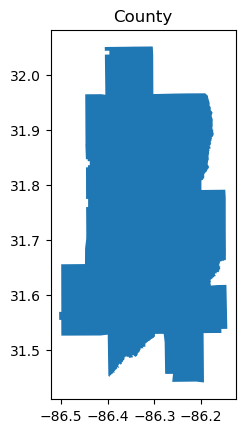

In [9]:
# This is the AOI of interest. You only want to calculate summary values for
# pixels within this AOI rather the entire rectangular spatial extent.
f, ax = plt.subplots()
county.plot(ax=ax)
ax.set(title="County")

plt.show()

In [10]:
# Create a 3d mask - this contains the true / false values identifying pixels
# inside vs outside of the mask region

county_mask = regionmask.mask_3D_geopandas(county,
                                               data.longitude,
                                               data.latitude)
county_mask

<xarray.DataArray 'mask' (region: 1, latitude: 35, longitude: 81)> Size: 3kB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * latitude   (latitude) float64 280B 49.5 48.75 48.0 47.25 ... 25.5 24.75 24.0
  * longitude  (longitude) float64 648B -126.0 -125.2 -124.5 ... -66.75 -66.0
  * region     (region) int64 8B 4
Attributes:
    standard_name:  region

In [11]:
# Apply the mask for California to the data
df_masked = year_avg.where(county_mask)
df_masked

<xarray.Dataset> Size: 523kB
Dimensions:        (valid_time: 1, latitude: 35, longitude: 81, region: 1)
Coordinates:
  * latitude       (latitude) float64 280B 49.5 48.75 48.0 ... 25.5 24.75 24.0
  * longitude      (longitude) float64 648B -126.0 -125.2 ... -66.75 -66.0
  * valid_time     (valid_time) datetime64[ns] 8B 2010-12-31
  * region         (region) int64 8B 4
Data variables: (12/46)
    d2m            (valid_time, latitude, longitude, region) float32 11kB nan...
    t2m            (valid_time, latitude, longitude, region) float32 11kB nan...
    bcaod550       (valid_time, latitude, longitude, region) float32 11kB nan...
    chnk           (valid_time, latitude, longitude, region) float32 11kB nan...
    duaod550       (valid_time, latitude, longitude, region) float32 11kB nan...
    lai_hv         (valid_time, latitude, longitude, region) float32 11kB nan...
    ...             ...
    aermssomhphob  (valid_time, latitude, longitude, region) float32 11kB nan...
    aermsssss      (valid_time, latitude, longitude, region) float32 11kB nan...
    aermssssm      (valid_time, latitude, longitude, region) float32 11kB nan...
    aermssssl      (valid_time, latitude, longitude, region) float32 11kB nan...
    aermsssu       (valid_time, latitude, longitude, region) float32 11kB nan...
    aermssso2      (valid_time, latitude, longitude, region) float32 11kB nan...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-10T00:09 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
df_masked.to_dataframe()

d2m  t2m  bcaod550  chnk  duaod550  \
valid_time latitude longitude region                                       
2010-12-31 49.5     -126.00   4       NaN  NaN       NaN   NaN       NaN   
                    -125.25   4       NaN  NaN       NaN   NaN       NaN   
                    -124.50   4       NaN  NaN       NaN   NaN       NaN   
                    -123.75   4       NaN  NaN       NaN   NaN       NaN   
                    -123.00   4       NaN  NaN       NaN   NaN       NaN   
...                                   ...  ...       ...   ...       ...   
           24.0     -69.00    4       NaN  NaN       NaN   NaN       NaN   
                    -68.25    4       NaN  NaN       NaN   NaN       NaN   
                    -67.50    4       NaN  NaN       NaN   NaN       NaN   
                    -66.75    4       NaN  NaN       NaN   NaN       NaN   
                    -66.00    4       NaN  NaN       NaN   NaN       NaN   

                                      lai_hv  lai_lv  msl  omaod550  pm2p5  \
valid_time latitude longitude region                                         
2010-12-31 49.5     -126.00   4          NaN     NaN  NaN       NaN    NaN   
                    -125.25   4          NaN     NaN  NaN       NaN    NaN   
                    -124.50   4          NaN     NaN  NaN       NaN    NaN   
                    -123.75   4          NaN     NaN  NaN       NaN    NaN   
                    -123.00   4          NaN     NaN  NaN       NaN    NaN   
...                                      ...     ...  ...       ...    ...   
           24.0     -69.00    4          NaN     NaN  NaN       NaN    NaN   
                    -68.25    4          NaN     NaN  NaN       NaN    NaN   
                    -67.50    4          NaN     NaN  NaN       NaN    NaN   
                    -66.75    4          NaN     NaN  NaN       NaN    NaN   
                    -66.00    4          NaN     NaN  NaN       NaN    NaN   

                                      ...  aermssdul  aermssbchphil  \
valid_time latitude longitude region  ...                             
2010-12-31 49.5     -126.00   4       ...        NaN            NaN   
                    -125.25   4       ...        NaN            NaN   
                    -124.50   4       ...        NaN            NaN   
                    -123.75   4       ...        NaN            NaN   
                    -123.00   4       ...        NaN            NaN   
...                                   ...        ...            ...   
           24.0     -69.00    4       ...        NaN            NaN   
                    -68.25    4       ...        NaN            NaN   
                    -67.50    4       ...        NaN            NaN   
                    -66.75    4       ...        NaN            NaN   
                    -66.00    4       ...        NaN            NaN   

                                      aermssomhphil  aermssbchphob  \
valid_time latitude longitude region                                 
2010-12-31 49.5     -126.00   4                 NaN            NaN   
                    -125.25   4                 NaN            NaN   
                    -124.50   4                 NaN            NaN   
                    -123.75   4                 NaN            NaN   
                    -123.00   4                 NaN            NaN   
...                                             ...            ...   
           24.0     -69.00    4                 NaN            NaN   
                    -68.25    4                 NaN            NaN   
                    -67.50    4                 NaN            NaN   
                    -66.75    4                 NaN            NaN   
                    -66.00    4                 NaN            NaN   

                                      aermssomhphob  aermsssss  aermssssm  \
valid_time latitude longitude region                                        
2010-12-31 49.5     -126.00   4              

In [13]:
## group by the valid time dimension. The result is same as above as there is only 1 time.
## this step is necessary to merge with the shape file

summary = df_masked.groupby("region").mean(["latitude", "longitude","valid_time"])
summary.to_dataframe()

,d2m,t2m,bcaod550,chnk,duaod550,lai_hv,lai_lv,msl,omaod550,pm2p5,...,aermssdul,aermssbchphil,aermssomhphil,aermssbchphob,aermssomhphob,aermsssss,aermssssm,aermssssl,aermsssu,aermssso2
region,,,,,,,,,,,,,,,,,,,,,
4,284.089142,291.484558,0.00647,0.018,0.011914,4.014191,2.456685,101691.210938,0.073927,1.494532e-08,...,0.000004,1.385899e-07,0.000002,5.488037e-07,0.000013,2.542961e-07,0.000018,0.000001,0.000008,9.565177e-07


In [16]:
type(county_gdf)

geopandas.geodataframe.GeoDataFrame

In [19]:
county_avg=summary.to_dataframe()

print(type(county_avg))
county_avg

<class 'pandas.core.frame.DataFrame'>


,d2m,t2m,bcaod550,chnk,duaod550,lai_hv,lai_lv,msl,omaod550,pm2p5,...,aermssdul,aermssbchphil,aermssomhphil,aermssbchphob,aermssomhphob,aermsssss,aermssssm,aermssssl,aermsssu,aermssso2
region,,,,,,,,,,,,,,,,,,,,,
4,284.089142,291.484558,0.00647,0.018,0.011914,4.014191,2.456685,101691.210938,0.073927,1.494532e-08,...,0.000004,1.385899e-07,0.000002,5.488037e-07,0.000013,2.542961e-07,0.000018,0.000001,0.000008,9.565177e-07


In [20]:
## merge by index

final_df = pd.merge(county_gdf, county_avg, left_index=True, right_index=True, how='left')
final_df.head(11)

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,d2m,t2m,bcaod550,...,aermssdul,aermssbchphil,aermssomhphil,aermssbchphob,aermssomhphob,aermsssss,aermssssm,aermssssl,aermsssu,aermssso2
0,0500000US01029,01,029,Cleburne,County,560.100,"POLYGON ((-85.38872 33.91304, -85.38088 33.873...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0500000US01031,01,031,Coffee,County,678.972,"POLYGON ((-86.03044 31.61894, -86.00408 31.619...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01037,01,037,Coosa,County,650.926,"POLYGON ((-86.00928 33.10164, -86.00917 33.090...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01039,01,039,Covington,County,1030.456,"POLYGON ((-86.34851 30.99434, -86.35023 30.994...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01041,01,041,Crenshaw,County,608.840,"POLYGON ((-86.14699 31.68045, -86.14711 31.663...",284.089142,291.484558,0.00647,...,0.000004,1.385899e-07,0.000002,5.488037e-07,0.000013,2.542961e-07,0.000018,0.000001,0.000008,9.565177e-07
5,0500000US01045,01,045,Dale,County,561.150,"POLYGON ((-85.79043 31.32027, -85.79033 31.323...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0500000US01049,01,049,DeKalb,County,777.093,"POLYGON ((-85.57593 34.82373, -85.56142 34.750...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0500000US01053,01,053,Escambia,County,945.080,"POLYGON ((-87.16308 30.99904, -87.16408 30.999...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0500000US01057,01,057,Fayette,County,627.660,"POLYGON ((-87.63593 33.87874, -87.63604 33.872...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0500000US01061,01,061,Geneva,County,574.408,"POLYGON ((-85.77267 30.99462, -85.77966 30.994...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
final_df=final_df.dropna() ## remove NaN
final_df

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,d2m,t2m,bcaod550,...,aermssdul,aermssbchphil,aermssomhphil,aermssbchphob,aermssomhphob,aermsssss,aermssssm,aermssssl,aermsssu,aermssso2
4,0500000US01041,01,041,Crenshaw,County,608.84,"POLYGON ((-86.14699 31.68045, -86.14711 31.663...",284.089142,291.484558,0.00647,...,0.000004,1.385899e-07,0.000002,5.488037e-07,0.000013,2.542961e-07,0.000018,0.000001,0.000008,9.565177e-07


In [22]:
type(final_df)

geopandas.geodataframe.GeoDataFrame

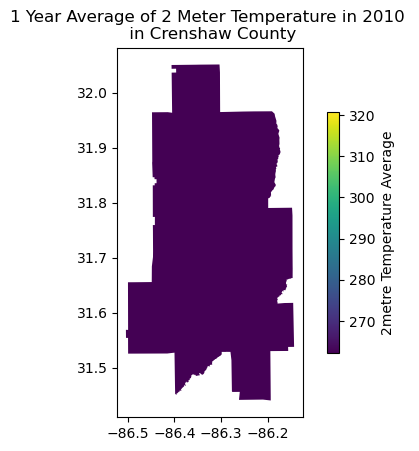

In [23]:
final_df.plot(column='t2m', legend=True, legend_kwds={"label": "2metre Temperature Average",
                                                                             "shrink":0.65})
plt.title('1 Year Average of 2 Meter Temperature in 2010 \n in Crenshaw County')
plt.show()